In [1]:
import pygame,pygame.sndarray

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
pygame.mixer.init(frequency=44100,size=-16,channels=1)

In [3]:
import numpy as np

In [4]:
arr=np.random.randint(-32768,32767,size=44100)

In [5]:
import matplotlib.pyplot as plt
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def plot_sequence(points,max=100,line=False,**kwargs):
    if line:
        plt.plot(range(0,max),points[0:max],**kwargs)
    else:
        plt.scatter(range(0,max),points[0:max],**kwargs)

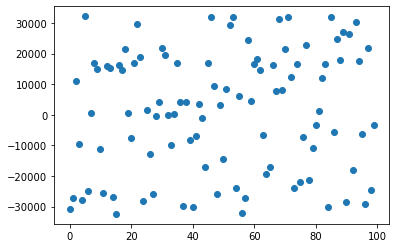

In [6]:
plot_sequence(arr,max=100)

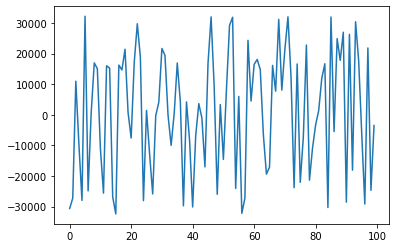

In [7]:
plot_sequence(arr,line=True,max=100)

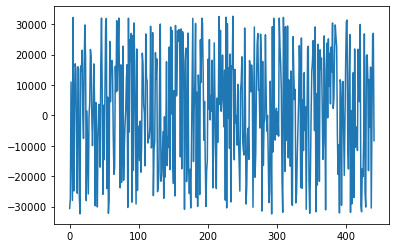

In [8]:
plot_sequence(arr,line=True,max=441)

In [9]:
arr=np.random.randint(-32768,32767,44100)
arr=arr.reshape(-1, 2)
sound=pygame.sndarray.make_sound(arr)
sound.play()

In [10]:
arr=np.random.randint(-10000,10000,44100)
arr=arr.reshape(-1, 2)
sound=pygame.sndarray.make_sound(arr)
sound.play()

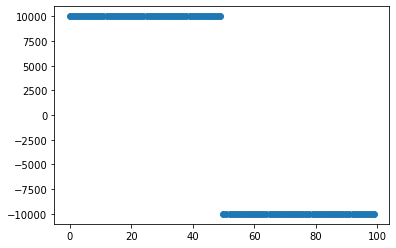

In [11]:
form=np.repeat([10000,-10000],50)
plot_sequence(form)

In [12]:
arr=np.tile(form,441)

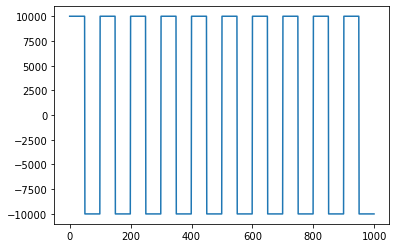

In [13]:
plot_sequence(arr,max=1000,line=True)

In [14]:
arr=arr.reshape(-1,2)
sound=pygame.sndarray.make_sound(arr)
sound.play()

In [15]:
form=np.repeat([10000,-10000],63)
arr=np.tile(form,2)
arr=arr.reshape(-1,2)
sound=pygame.sndarray.make_sound(arr)
sound.play()

In [16]:
def make_sinusoid(frequency,amplitude):
    def f(t):
        return amplitude*np.sin(2*np.pi*frequency*t)
    return f

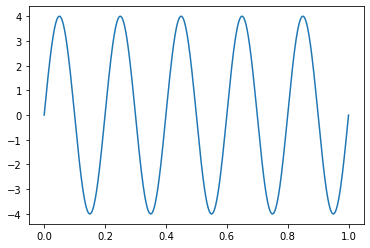

In [17]:
plot_function(make_sinusoid(5,4),0,1)

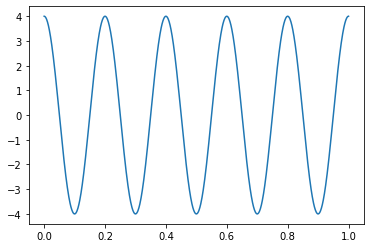

In [18]:
def make_cosusoid(frequency,amplitude):
    def f(t):
        return amplitude*np.cos(2*np.pi*frequency*t)
    return f
plot_function(make_cosusoid(5,4),0,1)

In [19]:
sinusoid=make_sinusoid(441,8000)

In [20]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [21]:
np.arange(0,1,1/44100)

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.99931973e-01, 9.99954649e-01, 9.99977324e-01])

In [22]:
def sample(f,start,end,count):
    mapf=np.vectorize(f)
    ts=np.arange(start,end,(end-start)/count)
    values=mapf(ts)
    return values.astype(np.int16)

In [23]:
arr=sample(sinusoid,0,1,44100)
arr=arr.reshape(-1,2)
sound=pygame.sndarray.make_sound(arr)
sound.play()

(-10.0, 10.0)

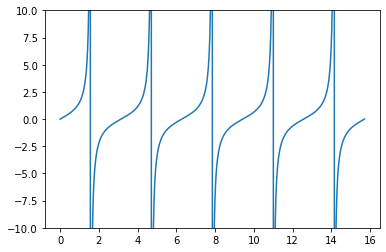

In [24]:
from math import tan,pi,cos,sin
plot_function(tan,0,5*pi)
plt.ylim(-10,10)

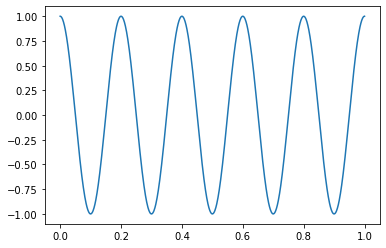

In [25]:
plot_function(lambda t:cos(10*pi*t),0,1)

In [26]:
np.array([1,2,3])+np.array([4,5,6])

array([5, 7, 9])

In [27]:
sample1=sample(make_sinusoid(441,8000),0,1,44100)
sample1=sample1.reshape(-1,2)
sample2=sample(make_sinusoid(551,8000),0,1,44100)
sample2=sample2.reshape(-1,2)

In [28]:
sound1=pygame.sndarray.make_sound(sample1)
sound2=pygame.sndarray.make_sound(sample2)
sound1.play()
sound2.play()

In [29]:
chord=pygame.sndarray.make_sound(sample1+sample2)
chord.play()

In [30]:
def const(n):
    return 1

def fourier_series(a0,a,b):
    def result(t):
        cos_terms=[an*cos(2*pi*(n+1)*t)
                  for (n,an) in enumerate(a)]
        sin_terms=[bn*sin(2*pi*(n+1)*t)
                  for (n,bn) in enumerate(b)]
        return a0*const(t)+sum(cos_terms)+sum(sin_terms)
    return result

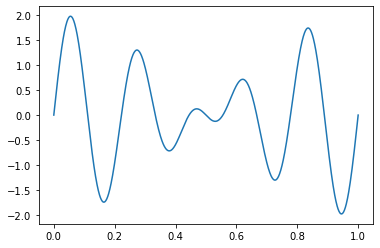

In [31]:
f=fourier_series(0,[0,0,0,0,0],[0,0,0,1,1])
plot_function(f,0,1)

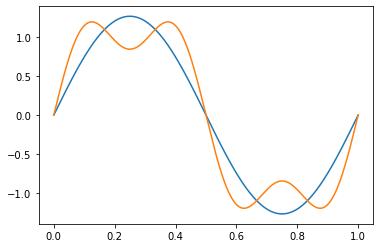

In [32]:
f1=fourier_series(0,[],[4/pi])
f3=fourier_series(0,[],[4/pi,0,4/(3*pi)])
plot_function(f1,0,1)
plot_function(f3,0,1)

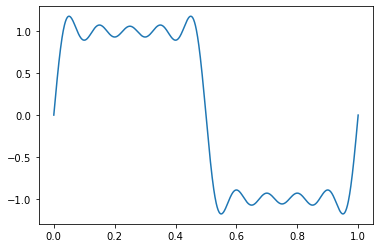

In [33]:
b=[4/(n*pi) if n%2!=0 else 0 for n in range(1,10)]
f=fourier_series(0,[],b)
plot_function(f,0,1)

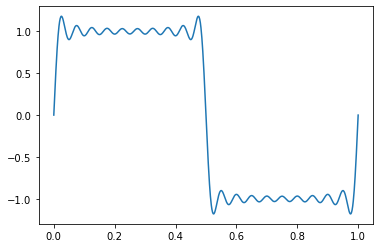

In [34]:
b=[4/(n*pi) if n%2!=0 else 0 for n in range(1,20)]
f=fourier_series(0,[],b)
plot_function(f,0,1)

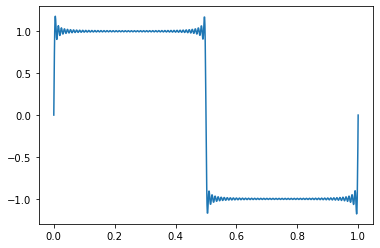

In [37]:
b=[4/(n*pi) if n%2!=0 else 0 for n in range(1,100)]
f=fourier_series(0,[],b)
plot_function(f,0,1)

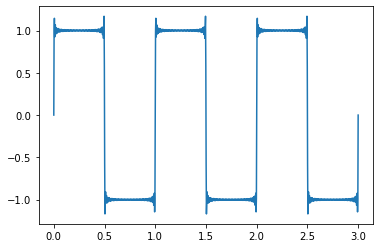

In [38]:
b=[4/(n*pi) if n%2!=0 else 0 for n in range(1,100)]
f=fourier_series(0,[],b)
plot_function(f,0,3)

In [41]:
arr=sample(lambda t:10000*f(441*t),0,1,44100)
arr=arr.reshape(-1,2)
sound=pygame.sndarray.make_sound(arr)
sound.play()

In [42]:
def inner_product(f,g,N=1000):
    dt=1/N
    return 2*sum([f(t)*g(t)*dt for t in np.arange(0,1,dt)])

In [43]:
def s(n):
    def f(t):
        return sin(2*pi*n*t)
    return f

def c(n):
    def f(t):
        return cos(2*pi*n*t)
    return f

In [44]:
inner_product(s(1),c(1))

4.2197487366314734e-17

In [45]:
inner_product(s(1),s(2))

-1.4176155163484784e-18

In [46]:
inner_product(c(3),s(10))

-1.7092447249233977e-16

In [47]:
inner_product(s(1),s(1))

1.0000000000000002

In [48]:
inner_product(c(1),c(1))

0.9999999999999999

In [49]:
inner_product(c(3),c(3))

1.0

In [50]:
from math import sqrt
def const(n):
    return 1/sqrt(2)

In [51]:
inner_product(const,s(1))

-3.404394821604484e-17

In [52]:
inner_product(const,c(1))

-3.404394821604484e-17

In [53]:
inner_product(const,const)

1.0000000000000007

In [54]:
def fourier_coefficients(f,N):
    a0=inner_product(f,const)
    an=[inner_product(f,c(n)) for n in range(1,N+1)]
    bn=[inner_product(f,s(n)) for n in range(1,N+1)]
    return a0,an,bn

In [56]:
f=fourier_series(0,[2,3,4],[5,6,7])
fourier_coefficients(f,3)

(-3.812922200197022e-15,
 [1.9999999999999887, 2.999999999999999, 4.0],
 [5.000000000000002, 6.000000000000001, 7.0000000000000036])

In [57]:
def square(t):
    return 1 if(t%1)<0.5 else -1

In [59]:
a0,a,b=fourier_coefficients(square,10)

In [61]:
b[0],4/pi

(1.273235355942202, 1.2732395447351628)

In [62]:
b[1],4/(3*pi)

(-1.399061259638873e-16, 0.4244131815783876)

In [63]:
b[4],4/(5*pi)

(0.2546269646514865, 0.25464790894703254)

In [65]:
def sawtooth(t):
    return t%1

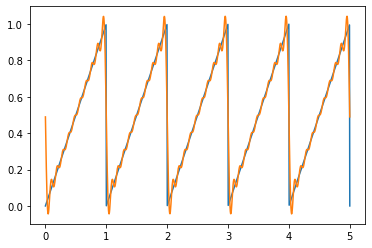

In [68]:
approx=fourier_series(*fourier_coefficients(sawtooth,10))
plot_function(sawtooth,0,5)
plot_function(approx,0,5)

In [69]:
fourier_coefficients(sawtooth,10)

(0.7063996744053609,
 [-0.0009999999999997394,
  -0.0009999999999999532,
  -0.0009999999999999775,
  -0.0009999999999999527,
  -0.0009999999999999827,
  -0.0009999999999999237,
  -0.0009999999999998075,
  -0.00100000000000048,
  -0.0010000000000003808,
  -0.0010000000000001548],
 [-0.31830883898555046,
  -0.1591528486912807,
  -0.10610015378333927,
  -0.07957328271164439,
  -0.06365674116287168,
  -0.053045364363156024,
  -0.04546551026419304,
  -0.03978035783976104,
  -0.03535833985123139,
  -0.03182051595377401])

In [73]:
def speedbumps(t):
    if abs(t%1 - 0.5) > 0.25:
        return 0
    else:
        return sqrt(0.25*0.25 - (t%1 - 0.5)**2)

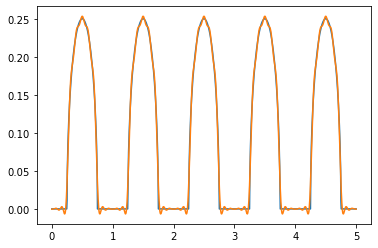

In [75]:
approx=fourier_series(*fourier_coefficients(speedbumps,10))
plot_function(speedbumps,0,5)

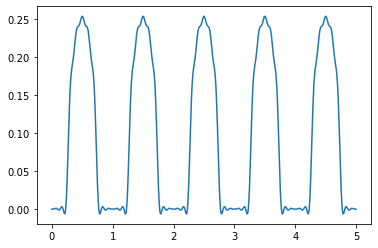

In [76]:
plot_function(approx,0,5)

In [77]:
def fourier_series(a0,a,b):
    def result(t):
        cos_terms=[an*cos(2*pi*(n+1)*t)
                  for (n,an) in enumerate(a)]
        sin_terms=[bn*sin(2*pi*(n+1)*t)
                  for (n,bn) in enumerate(b)]
        return a0/sqrt(2)+sum(cos_terms)+sum(sin_terms)
    return result

In [79]:
def modified_sawtooth(t):
    return 8000*sawtooth(441*t)
arr=sample(modified_sawtooth,0,1,44100)
arr=arr.reshape(-1,2)
sound=pygame.sndarray.make_sound(arr)
sound.play()